# Forecasting

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data\clean_data.csv')

In [3]:
data.head()

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO,EXPENSE,DAY,DATETIME
0,2022,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",004.948.028-63,GILBERTO PISELO DO NASCIMENTO,001/22,03/01/2022,Despesa com pagamento de aluguel de imóvel par...,6000.0,2173614,"Lease of properties for political office, incl...",1,2022-01-01
1,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,26.320.603/0001-64,INFORMANAHORA,000000000000310/A,04/01/2022,Despesa com divulgação da atividade parlamenta...,1500.0,2173615,Publication of parliamentary activity,1,2022-01-01
2,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,13.659.201/0001-47,LINHA PURPURA FOTO E VIDEO LTDA,107,14/01/2022,Despesa com produção de texto e edição de víde...,6000.0,2173616,Publication of parliamentary activity,1,2022-01-01
3,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,23.652.846/0001-01,ROBERTO GUTIERREZ DA ROCHA M.E.I.,187,18/01/2022,Divulgação da atividade parlamentar,1000.0,2173618,Publication of parliamentary activity,1,2022-01-01
4,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,08.941.827/0001-01,RONDONIA DINÂMICA COM. E SERV. DE INFORMÁTICA ...,000000000001772/A,17/01/2022,Divulgação da atividade parlamentar,2000.0,2173617,Publication of parliamentary activity,1,2022-01-01


In [27]:
#I separated the time series data
ts = pd.DataFrame(data.groupby('DATETIME', as_index = False)['VALOR_REEMBOLSADO'].sum())
ts['DATETIME'] = pd.to_datetime(ts['DATETIME'])
ts.sort_values('DATETIME', inplace = True)
ts.rename(columns={'DATETIME': 'DS', 'VALOR_REEMBOLSADO': 'RA'}, inplace = True)
ts.head()

,DS,RA
0,2008-01-02,900507.98
1,2008-01-03,1064673.39
2,2008-01-04,1032569.59
3,2008-01-05,918064.51
4,2008-01-06,922815.50


In [146]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(ts, test_size = 0.1, shuffle = False)

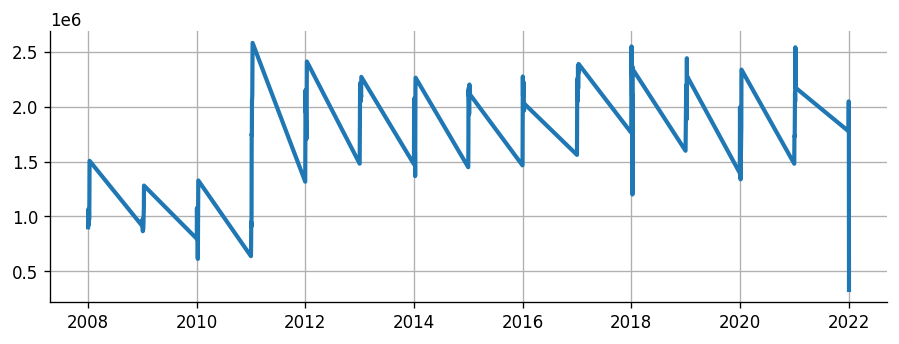

In [147]:
plt.plot('DS', 'RA', data = ts)
plt.grid()
plt.show()

In [148]:
from sklearn.metrics import mean_squared_error

In [149]:
#The Baseline Model
baseline = mean_squared_error(test.RA, [train.RA.mean()]*len(test), squared=False)

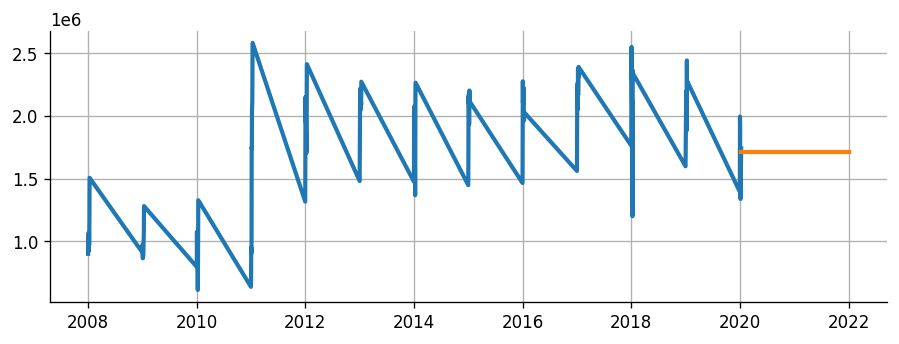

In [150]:
plt.plot(train.DS, train.RA, test.DS, [train.RA.mean()]*len(test))
plt.grid()
plt.show()

In [151]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(ts.RA.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.068942
p-value: 0.257185


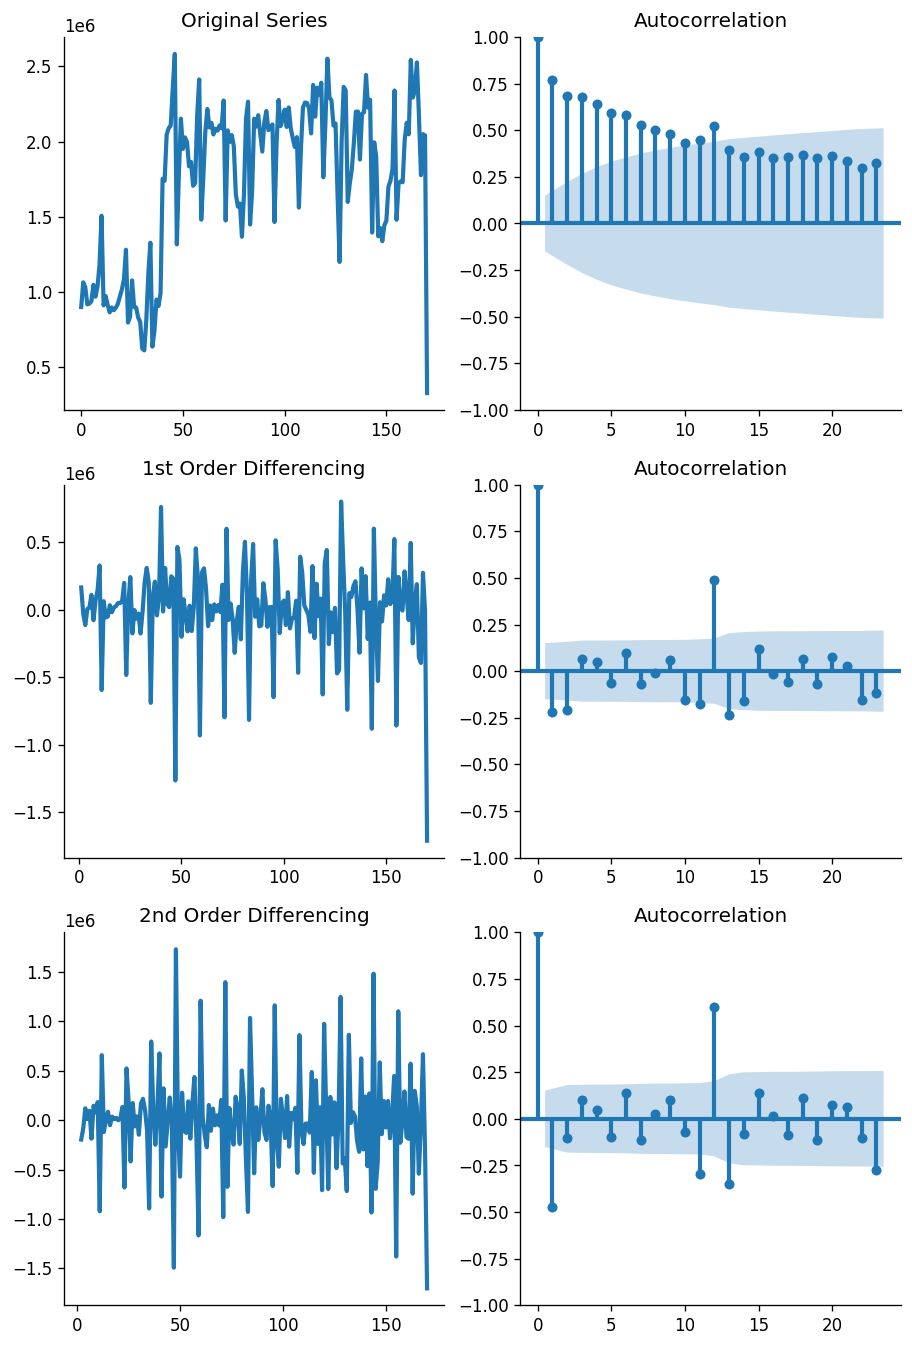

In [152]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,14), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(3, 2)
axes[0, 0].plot(ts.RA); axes[0, 0].set_title('Original Series')
plot_acf(ts.RA, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(ts.RA.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(ts.RA.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(ts.RA.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(ts.RA.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

D:\miniconda3\envs\meuCu\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


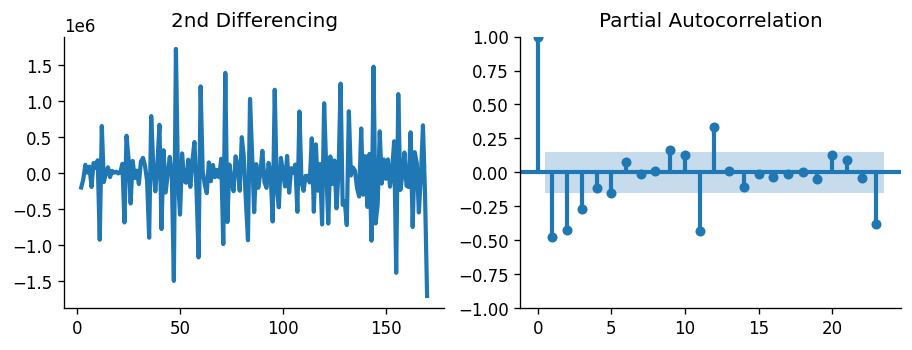

In [153]:
# PACF plot of 2nd differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2)
axes[0].plot(ts.RA.diff().diff()); axes[0].set_title('2nd Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(ts.RA.diff().diff().dropna(), ax=axes[1])

plt.show()

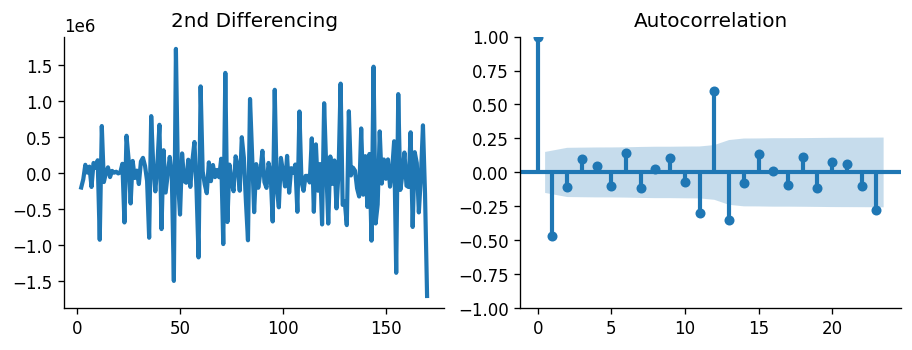

In [154]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2)
axes[0].plot(ts.RA.diff().diff()); axes[0].set_title('2nd Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(ts.RA.diff().diff().dropna(), ax=axes[1])

plt.show()

In [274]:
from statsmodels.tsa.arima.model import ARIMA
#p d q
# 2,3,1 ARIMA Model
model = ARIMA(train.RA, order=(1,2,2))
model_fit = model.fit()
fc = model_fit.forecast(18, alpha = 0.05)
fc_series = pd.Series(fc, index=test.index)
#lower_series = pd.Series(conf[:, 0], index=test.index)
#upper_series = pd.Series(conf[:, 1], index=test.index)

D:\miniconda3\envs\meuCu\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


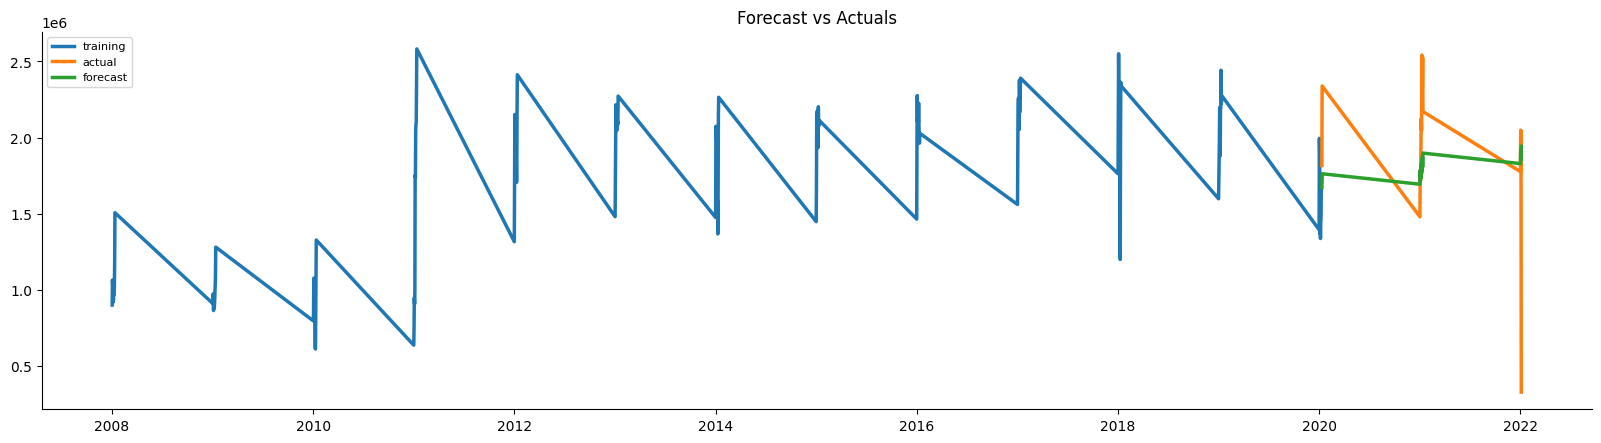

In [275]:
# Plot
plt.figure(figsize=(20,5), dpi=100)
plt.plot(train.DS, train.RA, label='training')
plt.plot(test.DS, test.RA, label='actual')
plt.plot(test.DS, fc_series, label='forecast')
#plt.fill_between(lower_series.index, lower_series, upper_series, 
#                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [276]:
print('baseline:', baseline, 'arima 231:', mean_squared_error(test.RA, fc_series,squared=False))

baseline: 540546.017349285 arima 231: 519121.1910992693


In [277]:
mean_squared_error(test.RA, fc_series, squared=False) > baseline

False